In [1]:
import numpy as np
import pickle
import math
import warnings
import cv2
from os.path import exists
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
np.random.seed(0)

In [2]:
def imshow(img):
    """
    This Function is used for ploting single image.
    """
    #Transposing the image to make it fit for ploting.
    imgtranspose = np.transpose(img, (1, 2, 0))
    plt.imshow(imgtranspose)
    plt.show()
    
def plot_individual_augmentation(fun, train_data, train_labels, num = 5):
    """
    This function is used for ploting specific augmentation on images.
    """
    fig = plt.figure(figsize=(10, 3))
    idx = np.random.randint(0, num_train_sample, num)
    for i in range(num):
        fig.add_subplot(2, num, i+1)
        plt.imshow(train_data[idx[i]].transpose(1, 2, 0))
        plt.axis('off')
        plt.title(classes[train_labels[idx[i]]])
        fig.add_subplot(2, num, i+num+1)
        plt.imshow(fun(train_data[idx[i]]).transpose(1, 2, 0))
        plt.axis('off')
        plt.title(classes[train_labels[idx[i]]])

def plot_augmentation(train_data, train_labels, num = 5):
    """
    This function is used to plot all types augmentation that can be applied to a image.
    """
    fig = plt.figure(figsize=(11, 11))
    idx = np.random.randint(0, num_train_sample, num)
    rows = num
    columns = 5
    for i in range(num):
        fig.add_subplot(rows, columns, (i*num)+1)
        plt.imshow(train_data[idx[i]].transpose(1, 2, 0))
        plt.ylabel(classes[train_labels[idx[i]]])
        plt.axis('off')
        if i == 0:
            plt.title("Original Image")
        fig.add_subplot(rows, columns, (i*num)+2)
        plt.imshow(random_Rotate(train_data[idx[i]]).transpose(1, 2, 0))
        plt.axis('off')
        if i ==0:
            plt.title("Random Rotation")
        fig.add_subplot(rows, columns, (i*num)+3)
        plt.imshow(random_Crop(train_data[idx[i]]).transpose(1, 2, 0))
        plt.axis('off')
        if i ==0:
            plt.title("Random Crop")
        fig.add_subplot(rows, columns, (i*num)+4)
        plt.imshow(random_Cutout(train_data[idx[i]]).transpose(1, 2, 0))
        plt.axis('off')
        if i==0:
            plt.title("Random Cutout")
        fig.add_subplot(rows, columns, (i*num)+5)
        plt.imshow(contrast_Horizontal_Flip(train_data[idx[i]]).transpose(1, 2, 0))
        plt.axis('off')
        if i == 0:
            plt.title("Contrast Horizontal Flip")

## Question 1

### Download the CIFAR-10 dataset (https://www.cs.toronto.edu/~kriz/cifar.html). Hint: Use pickle library to load the dataset.


In [3]:
def unpickle(filepath):
    """
    This function is used for loading the dataset from .tar file to numpy array.
    """
    with open(filepath, 'rb')  as fo:
        temp = pickle.load(fo, encoding = 'bytes')
        data, labels = temp[b'data'], temp[b'labels']
    return data, labels

#Declaring the path of folder where dataset is present
img_path = "../Dataset/cifar-10-batches-py/"

#Creating numpy array for storing the train data and labels
train_data = np.empty((0, 3072), int)
train_labels = np.array([])

#Loadning all the training dataset
for i in range(1, 6): 
    data_, labels_ = unpickle(img_path + "data_batch_" + str(i))
    train_data = np.append(train_data, data_, axis = 0)
    train_labels = np.append(train_labels, labels_)
    
#Loading test dataset
test_data, test_labels = unpickle(img_path + "test_batch")
test_labels = np.array(test_labels)

# Reshaping training and test data in required format ie., m*3072 -> m*3*32*32
# Where num of sample : m
#      num of channel : 3
#      height of img : 32
#      weidth of img : 32
    
train_data = train_data.reshape(len(train_data), 3, 32, 32)
test_data = test_data.reshape(len(test_data), 3, 32, 32)

#printning the shape of training and test dataset and labels
print("Train data shape :", train_data.shape)
print("Test data shape :", test_data.shape)
print("Train label shape :", train_labels.shape)
print("Test label shape", test_labels.shape)

Train data shape : (50000, 3, 32, 32)
Test data shape : (10000, 3, 32, 32)
Train label shape : (50000,)
Test label shape (10000,)


In [4]:
#Storing the info of number of train and test samples, number of channels in img and height and width of image
num_train_sample, num_channel, height, width = train_data.shape
num_test_sample = test_data.shape[0]

#Storing the num of classes and their names 
num_classes = 10
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
#Converting the datatype of labels from float to int
train_labels = train_labels.astype(int)
test_labels = test_labels.astype(int)

In [6]:
#Creating one hot vector of labels for train and test set
one_hot_train_label = np.zeros((train_labels.shape[0], num_classes))
one_hot_test_label = np.zeros((test_labels.shape[0], num_classes))

for i in range(train_labels.shape[0]):
    one_hot_train_label[i, train_labels[i]] = 1

for i in range(test_labels.shape[0]):
    one_hot_test_label[i, test_labels[i]] = 1

## Question 2

### Implement the image transformation methods mentioned below:

### 2.a) : Random Rotation in the range [−180◦, 180◦]

In [7]:
def random_Rotate(img, degree_range = [-180, 180]):
    """
    This function takes img of any size and rotate it from randomly selecting the degree from the range provided. 
    """
    #Making copy of the image so that there is no change in the original image.
    img = img.copy()
    
    #Stroing the info of image.
    n_channel, height, width = img.shape
    
    #Randomly select the degree from the range provided.
    degree = np.random.randint(degree_range[0], degree_range[1])
    
    #Changing the degree to radians.
    rad = np.radians(degree)
    
    #Calculating the sine(rad) and cosine(rad) so that we don't have to calculate it again and again.
    sin = np.sin(rad)
    cos = np.cos(rad)
    
    #Making space for storing rotated image.
    new_img = np.zeros_like(img)
    
    for h in range(height):
        for w in range(width):
            
            #Finding new position of every pixel of original image with respect to new center of rotated image.
            new_h, new_w = int(round(-(width-w-width//2-1)*sin+(height-h-height//2-1)*cos)), int(round((width-w-width//2-1)*cos+(height-h-height//2-1)*sin))
            
            #Finding the new position of every pixel with respect to center of original image.
            new_h = height//2 - new_h
            new_w = width//2 - new_w
            
            #Checking whether new position of pixel is in range or not and updating accordingly to it.
            if 0<=new_h<height and 0<=new_w<width:
                new_img[:, new_h, new_w] = img[:, h, w]
                
    return new_img

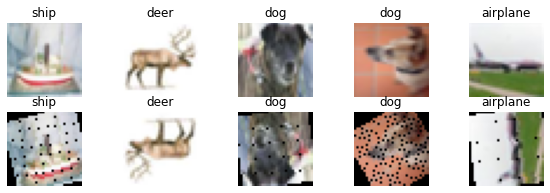

In [8]:
#Showing some images with Random Rotation 
plot_individual_augmentation(random_Rotate,train_data, train_labels, 5)

### 2.b) : Random cutout (randomly erase a block of pixels from the image with the width and height of the block in the range 0 to 16 pixels. The erased part (cutout) should be filled with a single value)

In [9]:
def random_Cutout(img, cut_range = [1, 16], value = 0):
    """
    This fucntion will take image and randomly block some pixel of the image. 
    Blocks are of random size and at random location.
    """
    
    #Making copy of the image so that there is no change in the original image.
    img = img.copy()
    
    #Storing the info of the original image.
    n_channel, height, width = img.shape
    
    #Randomly selecting the height and width of the cut from the provided range.
    cut_height = np.random.randint(cut_range[0], cut_range[1])
    cut_width = np.random.randint(cut_range[0], cut_range[1])
    
    #Randomly selecting the starting point (x, y) of the image from the range(1, height - cut_height), (1, width - cut_width)
    x = np.random.randint(1, height - cut_height)
    y = np.random.randint(1, width - cut_width)
    
    #Filling the pixel intensity of cutout portion with value provided.
    img[:, x:x+cut_height, y:y+cut_width] = value
    
    return img

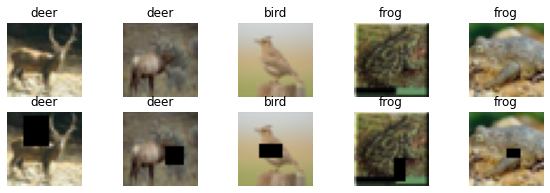

In [10]:
#Showing some images with Random Cutout
plot_individual_augmentation(random_Cutout,train_data, train_labels)

### 2.c): Random Crop (Add a padding of 2 pixels on all sides and randomly select a block of 32x32 pixels from the padded image)

In [11]:
def random_Crop(img, padding = 2, output_shape = [32, 32]):
    """
    This function is used to randomly crop the padded image.
    number of pixel to be padded on all side is passed as argument.
    """
    
    #Making copy of the image so there is no change in the original image.
    img = img.copy()
    
    #Storing the info of the image.
    n_channel, height, width = img.shape
    
    #Storing the info about in output shape of the image.
    out_height, out_width = output_shape
    
    #Creating space for the padded image with
    #new height = height + 2* padding
    #new width = width 2* padding
    new_img = np.zeros((n_channel, height + 2*padding, width + 2*padding)).astype(np.int32)
    
    #Storing the original image into the padded img.
    new_img[:, padding:padding + height, padding:padding + width] = img
    
    #Randomly selecting the starting point (x, y) from the range((0, 2*padding +1), (0, 2* padding + 1))
    x = np.random.randint(0, 2 * padding + 1)
    y = np.random.randint(0, 2 * padding + 1)
    
    #returning the croped image.
    return new_img[:, x:x+out_height, y:y+out_width]

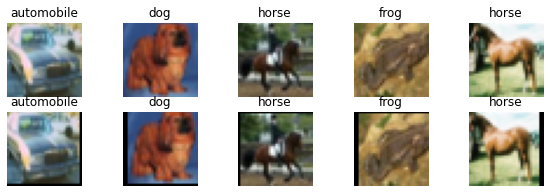

In [12]:
#Showing some images with Random Crop
plot_individual_augmentation(random_Crop,train_data, train_labels, 5)

### 2.d): Contrast & Horizontal flipping. (First, change the contrast of the image with a factor of α randomly selected from the range (0.5, 2.0) and then flip the image horizontally with a probability of 0.5)

In [13]:
def contrast_Horizontal_Flip(img, alpha_range = [0.5, 2.0], prob = 0.5):
    """
    This function is used to change the contrast of ther image by randomly choosing the value of alpha 
    from the range provided. Also it horizontally flip the image with the probability given(default prob = 0.5).
    """
    
    #Making copy of image so that there is no change in original image
    img = img.copy()
    
    #Storing the info of image
    n_channel, height, width = img.shape
    
    #Randomly selecting alpha from the uniform distribution of provided alpha range.
    alpha = np.random.uniform(alpha_range[0], alpha_range[1])
    
    #Changing contrast of the image.
    img[:, :, :] = alpha * (img - 128) + 128
    
    #Cliping the image so that all the pixel values comes in the range of (0, 255)
    img[img<0] = 0
    img[img>255] = 255
    
    #Horizontally fliping the image with probability of prob which is 0.5.
    img = img[:, :, ::-1] if np.random.rand() > prob else img
        
    return img

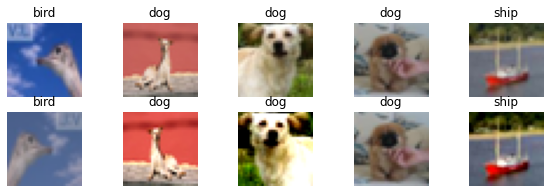

In [14]:
#Showing some image with contrast and random horizontal flip.
plot_individual_augmentation(contrast_Horizontal_Flip,train_data, train_labels, 5)

#### Showing all the transformation or augmentation on 5 random examples.

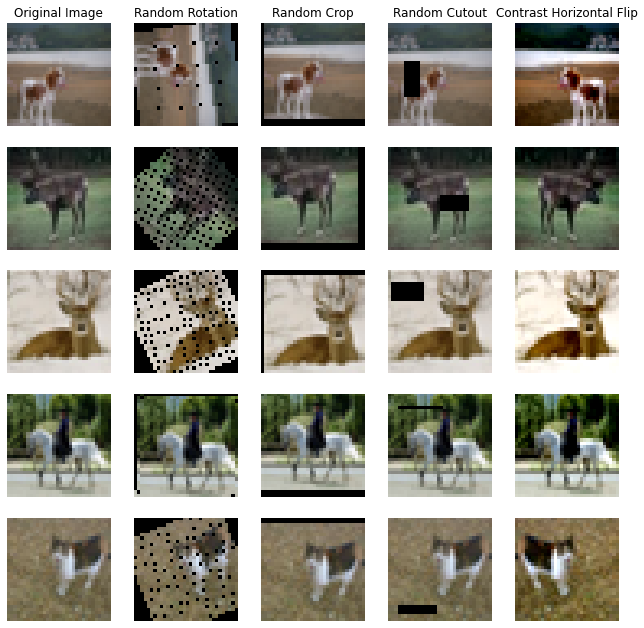

In [15]:
plot_augmentation(train_data, train_labels)

## Question 3

### Create the augmented training set using the transformation functions implemented in the previous part. Randomly select one of the four transformations for each image in the training set and apply it to that image. Combine the transformed images with original training set to get the augmented training set. Note that the number of examples for the augmented training set will be twice that of the unaugmented training set.

In [16]:
def data_Augmentation(img):
    """
    This function take image and return the new image after performing some random transformation from above.
    """
    
    #Making Copy of the image so that there is no change in original image.
    img = img.copy()
    
    #Randomly selecting the choice of augmentation that has to be performed in the image.
    choice = np.random.randint(0, 4)
    
    #If choice == 0 then perform Random Rotation.
    if choice == 0:
        return random_Rotate(img)
    
    #If choice == 1 then perform Random Cutout.
    elif choice == 1:
        return random_Cutout(img)
    
    #If choice == 2 then perform Random Crop.
    elif choice == 2:
        return random_Crop(img)
    
    #If choice ==3 then perform Contrast and Horizontal Flip.
    elif choice == 3:
        return contrast_Horizontal_Flip(img)

In [17]:
def create_augmented_data(dataset, labels):
    """
    This function takes dataset as arugment create new augmented image(randomly select the choice of augmentation) 
    for every image of the dataset and return newly create dataset which has both original image and augmented image.
    """
    
    #Storing the info of the dataset
    num_sample, num_channels, height, width = dataset.shape
    
    #Calculating the number of sample after augmentation ie., two time original number of sample.
    num_augmented_samples = num_sample * 2
    
    #Creating space for storing the augmented image and original image data and labels.
    augmented_data = np.zeros((num_augmented_samples, num_channels, height, width))#.astype(np.int32)
    augmented_label = np.zeros((num_augmented_samples, num_classes))
    
    #Looping the original image dataset single image per iteration. 
    for i in range(num_sample):
        img = dataset[i]
        
        #Calling the data_Augmentation function created above for performing the augmentation on the current image.
        new_img = data_Augmentation(img)
        
        augmented_data[2*i] = new_img        #Storing the augmented image data.
        augmented_data[2*i+1] = img          #Storing the original image data.
        augmented_label[2*i] = labels[i]     #Storing the augmented image label.
        augmented_label[2*i+1] = labels[i]   #Storing the origianl image label.
    
    return augmented_data, augmented_label

Creating the Augmented dataset from the train dataset and printing their shape.

In [18]:
%%time
augmented_data, augmented_label = create_augmented_data(train_data, one_hot_train_label)
print("Augmented Train data shape :", augmented_data.shape)
print("Augmented Train labels shape :", augmented_label.shape)

Augmented Train data shape : (100000, 3, 32, 32)
Augmented Train labels shape : (100000, 10)
Wall time: 1min 3s


## Question 4

### Use the feature extractor.py file provided with the assignment on the original (unaugmented) CIFAR-10 dataset and on the augmented dataset to get 1-dimensional input vectors. You can ignore the implementation of feature extractor.py and use it directly.


In [19]:
def resize(image):
    """
    This function will take image of any size and return resize image of size (224 X 224).
    """
    #Making copy of the image so that there is no change in original image.
    img = image.copy()
    
    #Changing the position of the channel of the image from channel first to channel last.
    #Also changing the datatype to unsigned integer.
    img = np.transpose(img, (1, 2, 0)).astype(np.uint8)
    
    #Calling cv2.resize function for resizing the image.
    img = cv2.resize(img, (224, 224))
    
    return img

In [20]:
def create_resized_dataset(dataset):
    """
    This funciton will take dataset of image and return the dataset containg the resized images.
    """
    #Storing the number of sample.
    num_sample = dataset.shape[0]
    
    #Creating the space for storing the new images after resize operation.
    resized_train_img = np.zeros((num_sample, 3, 224, 224))
    
    for i in range(num_sample):
        #Calling the resize function.
        resized_img = resize(dataset[i])
        
        #After performing the resize operation changing the image from channel last to channel first.
        resized_img = np.transpose(resized_img, (2, 0, 1))
        
        #Storing the new resized image in created sapce.
        resized_train_img[i] = resized_img
        
    return resized_train_img

In [21]:
def create_batch(img_list, label_list, batch_size = 128):
    """
    This funciton takes feature matrix and label matrix and return the list of batches of batch_size.
    """
    
    #Creating the list for storing the batches.
    batch_X = []
    batch_Y = []
    
    #Calculating the total number of batches that can be made.
    num_batches = int(np.ceil(len(img_list) / batch_size))
    
    for i in range(num_batches-1):
        
        #Appending all the batches in above created list.
        batch_X.append(img_list[i*batch_size:(i+1)*batch_size])
        batch_Y.append(label_list[i*batch_size:(i+1)*batch_size])
        
    #Appending the last batch into the list which may has lesser samples 
    batch_X.append(img_list[(i+1)*batch_size:])
    batch_Y.append(label_list[(i+1)*batch_size:])
    
    return batch_X, batch_Y

In [22]:
def create_data_feature(obj, dataset, labels):
    
    """
    This funciton takes dataset, label, and BBResNet18 object as arguments and return the extracted feature from BBResNet18
    class.
    """
    
    #Creating batch of dataset and labels.
    batch_X, batch_Y = create_batch(dataset, labels, 64)
    
    #Creating list for storing feature.
    data_feature = []
    
    #Looping over each epoch.
    for inputs in batch_X:
        
        #Resizing the dataset acording to BBResNet18 input size.
        resized_inputs = create_resized_dataset(inputs)
        
        #Passing the resized dataset into BBResNet18 for feature extraction.
        #Performing "Normalization" by dividing image by 255 for fast computation and better accuracy.
        #Changing the datatype of image from int to flaot32 according to BBResNet18.
        batch_features = obj.feature_extraction((resized_inputs/255).astype('float32'))
        
        #Extending the data feature of current batch into the list 
        data_feature.extend(batch_features)
    
    #Converting the data_feature to numpy array.
    data_feature = np.array(data_feature)
    
    return data_feature

Importing the BBResNet18 class form feature_extractor module and creating object of it.

In [23]:
from feature_extractor import BBResNet18
obj = BBResNet18()

### You have to run the bellow 3 cell because exteracted feature file is not present with assignment

In [24]:
#If you don't wanted to extract feature again otherwise make it false.
load_feature = True

Extracting data feature for training dataset, augemted dataset and test dataset storing it and printing the shape of it.

In [25]:
%%time
if load_feature:
    
    if exists("BBResNet18_features.pkl") == False:
            print("File is not present")
            print("Loading......")
            load_feature = False
    else:
        file = open("BBResNet18_features.pkl", "rb")
        BBResNet18 = pickle.load(file)
        train_data_feature = BBResNet18['train_data_feature']
        train_labels = BBResNet18['train_labels']
        augmented_data_feature = BBResNet18['augmented_data_feature']
        augmented_label = BBResNet18['augmented_label']
        test_data_feature = BBResNet18['test_data_feature']
        test_labels = BBResNet18['test_labels']
        print("Feature are loaded succesfully.")
            
if load_feature == False: 
    
    #Extracting data feature for training dataset and storing it in train_data_feature.
    train_data_feature = create_data_feature(obj, train_data, train_labels)
    
    #Extracting data feature for augmented dataset and storing it in augmented_data_feature.
    augmented_data_feature = create_data_feature(obj, augmented_data, augmented_label)
    
    #Extracting data feature for test dataset and storing it in test_data_feature.
    test_data_feature = create_data_feature(obj, test_data, test_labels)
    
    
    #Saving the feature for easy future use.
    BBResNet18_features = {"train_data_feature" : train_data_feature,
                      "train_labels": train_labels,
                      "augmented_data_feature" : augmented_data_feature,
                      "augmented_label" : augmented_label,
                      "test_data_feature" : test_data_feature,
                      "test_labels" : test_labels}

    file = open("BBResNet18_features.pkl", "wb")
    pickle.dump(BBResNet18_features, file)
    file.close()


#printing the shape of extracted feature
print("train data feature shape", train_data_feature.shape)
print("augmented data feature shape", augmented_data_feature.shape)
print("test data feature shape", test_data_feature.shape)

Feature are loaded succesfully.
train data feature shape (50000, 512)
augmented data feature shape (100000, 512)
test data feature shape (10000, 512)
Wall time: 126 ms


## Question 5 and Question 6


### 5): Implement a multi-layer perceptron (MLP) for classification of CIFAR-10 images. Use only a single hidden layer with 64 neurons and ReLu activation function. The input to this MLP will be the 1-dimensional vectors generated in the previous step. [10 Marks]

### 6): Implement the back-propagation algorithm and use it to train the MLP model on: [20 marks]
### (a) original training set
### (b) augmented training set
### You are not allowed to use built in functions that performs back propagation directly. You should write your own back propagation algorithm.


**Note :** I have implemented both Question 5 and 6 in a single class.

In [26]:
class MLP:
    """
    This class is the blueprint to for training MLP for CIFAR 10 datset. It first initializes all the parametes of the model.
    It has 3 layers with 512, 64, 10 nodes in each layer. You can train the model by calling train model and evaluate the 
    results on the test test set also. Using this funciton you can get prediciton as well.
    """
    def __init__(self, X, Y, X_test, Y_test, lr_rate = 0.001, batch_size = 128, epochs = 200):
        """
        This function is used to intialize all the parameters of the MLP.
        """
        np.random.seed(0)
        
        #Initializing the number of input, hidden and output nodes of the network.
        self.num_input_node = 512
        self.num_hidden_nodes = 64
        self.num_output_node = 10
        
        #Storing the total number of samples.
        self.total_sample = X.shape[0]

        #Randomly initializing the Weights and Biases of the network.
        #Dividing it by 1e3 to make weights very small.
        self.w1 = np.random.randn(self.num_input_node, self.num_hidden_nodes)/(1e3)       #(512, 64)
        self.b1 = np.zeros((1, self.num_hidden_nodes))                                    #(1, 64)
        self.w2 = np.random.randn(self.num_hidden_nodes, self.num_output_node)/(1e3)      #(64, 10)
        self.b2 = np.zeros((1, self.num_output_node))                                     #(1, 10)
        
        #Initializing and storing gradient.
        self.dw2 = None
        self.db2 = None
        self.dw1 = None
        self.db1 = None
        
        #Initializing and storing Intermidiate result of forward pass.
        self.z1 = None
        self.a1 = None
        self.z2 = None
        self.a2 = None
        
        #Initializing learning rate, batch size and number of epochs
        self.lr_rate = lr_rate
        self.batch_size = batch_size
        self.epochs = epochs
        
        #Initializing feature matrix and label matrix
        self.data = X
        self.labels = Y
        self.X_test = X_test
        self.Y_test = Y_test
        
        #For storing training loss and accuracy for each epoch.
        self.training_loss = []
        self.training_acc = []
        self.test_loss= []
        self.test_acc = []
        
        #Making dictonary of parameters so that storing and loading can be simple.
        self.parameters = {'W1' : self.w1, 'B1' : self.b1, 'W2' : self.w2, 'B2' : self.b2}
        
        #Storing the filename which store the parameters.
        self.filename = None
    
    def relu(self, X):
        """
        This function performs the ReLU activation on the given input.
        
        f(x) = max(0, x)
        """
        return np.maximum(X, 0)
    
    def softmax(self, X):
        """
        This function performs the softmax operation on the given input.
        """
        return np.exp(X)/np.sum(np.exp(X), axis = 1).reshape(X.shape[0], 1)
    
    def loss_function(self, y_hat, y):
        """
        This function return the average cross entropy loss of current batch.
        
        loss = -(\sum{y_i}{log{\hat{y}_i}})/batch_size
        """
        return -np.sum(y * np.log(y_hat)) / y.shape[0]
    
    def accuracy(self, y_hat, y):
        """
        This function return the average accuracy of the current batch.
        """
        return (np.argmax(y, axis = 1) == np.argmax(y_hat, axis=1)).mean()
    
    def forward_pass(self, inputs):
        """
        This function is used to perform the forward pass on the input batch.
        """
    
        self.z1 = np.matmul(inputs, self.w1) + self.b1        #(m, 64) <-- (m, 512) X (512, 64) + (1, 64)
        self.a1 = self.relu(self.z1)                          #(m, 64) <-- (m, 64)     Applying ReLU activation function
        self.z2 = np.matmul(self.a1, self.w2) + self.b2       #(m, 10) <-- (m, 64) X (64, 10) + (1, 10)
        self.a2 = self.softmax(self.z2)                       #(m, 10) <-- (m, 10)     Applying Softmax activation function
        
    def backward_pass(self, inputs, labels):
        """
        This function is used to perform back propogation.
        Dividing gradient by sample size for normalization.
        """
        
        sample_size = inputs.shape[0]                        #Storing the number of sample in the batch
        
        dz2 = self.a2 - labels                               #Gradient of Loss with respect to Z2
        self.dw2 = np.dot(self.a1.T, dz2) / sample_size      #Gradient of Loss with respect to W2
        self.db2 = np.sum(dz2, axis = 0) / sample_size       #Gradient of Loss with respect to B2
        
        self.a1[self.a1>0] = 1                               #Calculating gradient of ReLU activation 
        g1 = self.a1
        
        dz1 = np.dot(dz2, self.w2.T) * g1                    #Gradient of Loss with respect to Z1
        self.dw1 = np.dot(inputs.T, dz1) / sample_size       #Gradient of Loss with respect to W1
        self.db1 = np.sum(dz1, axis = 0) / sample_size       #Gradient of Loss with respect to b1
    
    def gradient_descent(self):
        """
        This function is used to update weight and bias of the network using gradients calculated in backpropogation step.
        """
        self.w2 = self.w2 - self.lr_rate * self.dw2
        self.b2 = self.b2 - self.lr_rate * self.db2
        self.w1 = self.w1 - self.lr_rate * self.dw1
        self.b1 = self.b1 - self.lr_rate * self.db1
    
    def train(self):
        """
        This function is used to train the network.
        """
        
        #Creating mini batches of data for training.
        batch_X, batch_Y = create_batch(self.data, self.labels, self.batch_size)
    
        num_batches = len(batch_X)                             #Storing the number of batchs.

        for epoch in range(self.epochs):                       #Iterating over each epoch.

            if (epoch+1)%100 == 0:                             #Leraning Rate Decay: After every 100 epoch 
                self.lr_rate = self.lr_rate * 0.1              #learning rate will be reduced by the factor of 0.3
            
            running_loss = 0                                   #For storing total training loss occured in an epoch.
            running_acc = 0                                    #For storing total training accuracy on current epoch. 

            for itr in range(num_batches):                     #Looping over each batch.

                inputs, labels = batch_X[itr], batch_Y[itr]    #Defining inputs and labels for current batch.

                num_sample = inputs.shape[0]                   #Storing total number of sample in current batch.

                self.forward_pass(inputs)                      #Performing forward pass for current iteration.

                self.backward_pass(inputs, labels)             #Performing backward pass for current iteration.
                
                self.gradient_descent()                        #Performing gradient descent for current iteration.
                
                loss = self.loss_function(self.a2, labels)     #Calculating loss for current iteration.
                acc = self.accuracy(self.a2, labels)           #Calculating accuracy for iteration. 
                
                running_acc += acc*num_sample                  #Adding current batch loss and accuracy. Multiplying it batch
                running_loss += loss*num_sample                #size because acc and loss are mean of the current batches.
            
            epoch_loss = running_loss/self.total_sample        #Calculating average training loss and accuaracy by dividing
            epoch_acc = running_acc/self.total_sample          #it by total number of sample.
            
            self.training_acc.append(epoch_acc*100)            #Appending training accuracy and loss
            self.training_loss.append(epoch_loss) 
            
            test_l, test_a = self.evaluate()                   #Checking the loss and accuracy after training for every epoch.
                                                               #on test dataset.
            self.test_acc.append(test_a)                       #Appending loss and accuracy of test dataset.
            self.test_loss.append(test_l)
            
            #Printing status of training after every 10 epochs.
            if epoch == 0 or (epoch + 1)%10 == 0 or epoch == self.epochs - 1:
                print("Epoch : {:d}, Training Loss : {:.3f}, Training Accuracy : {:.3f} ".format(epoch + 1, epoch_loss, epoch_acc*100))
    
    def predict(self, X):
        """
        This funciton is used to predict the output of the given dataset.
        """
        self.forward_pass(X)                       #Performing forward pass on given dataset.
        return np.argmax(self.a2, axis = 1)        #Returning the labels for given dataset.
        
    def evaluate(self, Print = False):
        """
        This function is used to evaluate performance of the model on test dataset.
        """
        self.forward_pass(self.X_test)                            #Performing forward pass on test set.
        acc = self.accuracy(self.a2, self.Y_test)                 #Calculating test accuracy.
        loss = self.loss_function(self.a2, self.Y_test)           #Calculating test loss
        
        if Print:
            print("Loss : {:.3f}, Accuracy : {:.3f}".format(loss, acc*100))
            return 
        
        return loss, acc
    
    def plot(self):
        """
        This function is used to plot training accuracy and loss per epoch.
        """
        #Ploting Loss per epoch graph.
        fig = plt.figure(figsize=(10, 4))
        fig.add_subplot(1, 2, 1)
        plt.plot(self.training_loss, color = 'r')
        plt.grid()
        plt.xlabel("Number of epochs")
        plt.ylabel("Average Cross Entropy Loss")
        plt.title("Loss/Epoch graph")
        
        #Ploting Accuracy per epoch graph.
        fig.add_subplot(1, 2, 2)
        plt.plot(self.training_acc)
        plt.grid()
        plt.xlabel("Number of epochs")
        plt.ylabel("Percente Accuracy")
        plt.title("Accuracy/Epoch graph")
        plt.show()
        
    def save(self, filename):
        """
        This function will save the parameters in the filename provided.
        """
        #Updating the parameters
        self.parameters = {'W1' : self.w1, 'B1' : self.b1, 'W2' : self.w2, 'B2' : self.b2}
        self.filename = filename
        
        #Opening file and saving the aprameters
        file = open(self.filename, "wb")
        pickle.dump(self.parameters, file)
        file.close()
        print("Model is saved successfully.")
    
    def load(self, filename):
        """
        This function will the model from the path provided in the argument.
        """
        if exists(filename) == False:
            print("This model has no parameters saved")
        else:
            #Loading the model
            self.filename = filename
            file = open(self.filename, "rb")
            self.parameters = pickle.load(file)
            
            #Setting the parameters with the loaded model.
            self.w1 = self.parameters['W1']
            self.b1 = self.parameters['B1']
            self.w2 = self.parameters['W2']
            self.b2 = self.parameters['B2']
            print("Model is loaded succesfully.")


# -----------------------------------------------------------------------------------------------------------------

# If you dont want to train the model again just go to last section and use trained model.

# -----------------------------------------------------------------------------------------------------------------

### Training model using Original dataset with learning rate = 0.01, batch size = 64 and number of epochs = 300

In [27]:
%%time
unaugmented_model = MLP(train_data_feature, one_hot_train_label, 
                        test_data_feature, one_hot_test_label, 
                        lr_rate = 0.01, batch_size = 64, epochs = 300)
unaugmented_model.train()

Epoch : 1, Training Loss : 2.207, Training Accuracy : 17.314 
Epoch : 10, Training Loss : 0.681, Training Accuracy : 76.170 
Epoch : 20, Training Loss : 0.594, Training Accuracy : 79.194 
Epoch : 30, Training Loss : 0.562, Training Accuracy : 80.416 
Epoch : 40, Training Loss : 0.541, Training Accuracy : 81.050 
Epoch : 50, Training Loss : 0.524, Training Accuracy : 81.628 
Epoch : 60, Training Loss : 0.508, Training Accuracy : 82.158 
Epoch : 70, Training Loss : 0.494, Training Accuracy : 82.718 
Epoch : 80, Training Loss : 0.480, Training Accuracy : 83.170 
Epoch : 90, Training Loss : 0.467, Training Accuracy : 83.714 
Epoch : 100, Training Loss : 0.439, Training Accuracy : 84.696 
Epoch : 110, Training Loss : 0.435, Training Accuracy : 84.852 
Epoch : 120, Training Loss : 0.433, Training Accuracy : 84.874 
Epoch : 130, Training Loss : 0.431, Training Accuracy : 84.956 
Epoch : 140, Training Loss : 0.430, Training Accuracy : 85.022 
Epoch : 150, Training Loss : 0.428, Training Accura

#### Ploting the Loss and Accuracy Graph for augmented model.

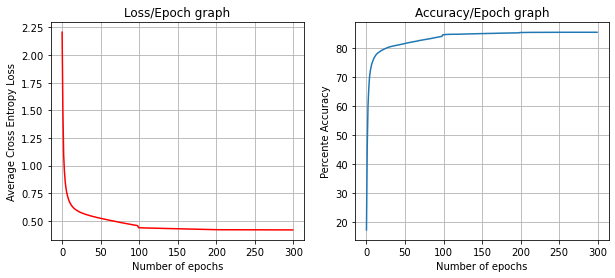

In [28]:
unaugmented_model.plot()

In [29]:
#Saving the model for future use 
unaugmented_model.save("unaugmented_model.pkl")

Model is saved successfully.


### Training model using Augmented dataset with learning rate = 0.01, batch size = 64 and number of epochs = 300 

In [30]:
%%time
augmented_model = MLP(augmented_data_feature, augmented_label, 
                      test_data_feature, one_hot_test_label,
                      lr_rate = 0.01, batch_size = 64, epochs = 300)
augmented_model.train()

Epoch : 1, Training Loss : 2.013, Training Accuracy : 25.105 
Epoch : 10, Training Loss : 0.833, Training Accuracy : 70.411 
Epoch : 20, Training Loss : 0.770, Training Accuracy : 72.658 
Epoch : 30, Training Loss : 0.734, Training Accuracy : 73.874 
Epoch : 40, Training Loss : 0.707, Training Accuracy : 74.829 
Epoch : 50, Training Loss : 0.685, Training Accuracy : 75.590 
Epoch : 60, Training Loss : 0.667, Training Accuracy : 76.232 
Epoch : 70, Training Loss : 0.650, Training Accuracy : 76.858 
Epoch : 80, Training Loss : 0.636, Training Accuracy : 77.392 
Epoch : 90, Training Loss : 0.622, Training Accuracy : 77.947 
Epoch : 100, Training Loss : 0.589, Training Accuracy : 79.072 
Epoch : 110, Training Loss : 0.583, Training Accuracy : 79.326 
Epoch : 120, Training Loss : 0.581, Training Accuracy : 79.432 
Epoch : 130, Training Loss : 0.579, Training Accuracy : 79.501 
Epoch : 140, Training Loss : 0.577, Training Accuracy : 79.555 
Epoch : 150, Training Loss : 0.575, Training Accura

#### Ploting the Loss and Accuracy Graph for augmented model.

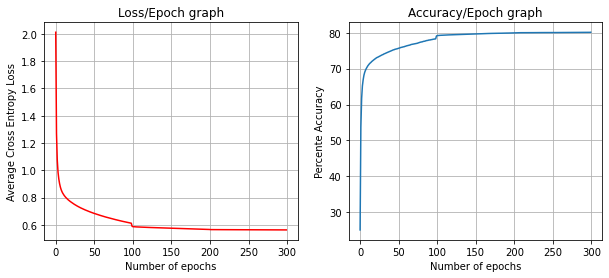

In [31]:
augmented_model.plot()

In [32]:
#Saving the model for future use 
augmented_model.save("augmented_model.pkl")

Model is saved successfully.


## Question 7

### Evaluate the performance of the following trained MLP models on the original (unaugmented) test set: [10 marks]
### (a) MLP model, trained on original training set
### (b) MLP model, trained on augmented training set

#### Printing the test set Loss and Accuracy using unaugmented model

In [33]:
unaugmented_model.evaluate(Print=True)

Loss : 0.580, Accuracy : 80.140


#### Printing the test set Loss and Accuracy using augmented model¶

In [34]:
augmented_model.evaluate(Print=True)

Loss : 0.579, Accuracy : 80.680


#### Ploting both model's training accuracy and loss for comparision.

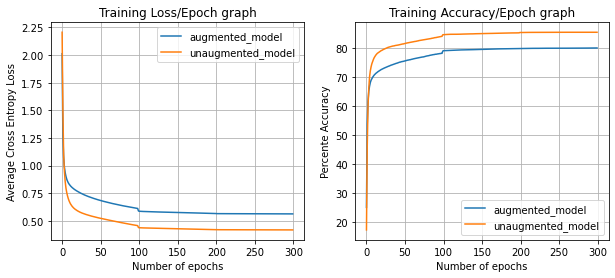

In [35]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.plot(augmented_model.training_loss, label = 'augmented_model')
plt.plot(unaugmented_model.training_loss, label = 'unaugmented_model')
plt.grid()
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Average Cross Entropy Loss")
plt.title("Training Loss/Epoch graph")

#Ploting Accuracy per epoch graph.
fig.add_subplot(1, 2, 2)
plt.plot(augmented_model.training_acc, label = 'augmented_model')
plt.plot(unaugmented_model.training_acc, label = 'unaugmented_model')
plt.grid()
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Percente Accuracy")
plt.title("Training Accuracy/Epoch graph")
plt.show()

#### Ploting both model's test accuracy and loss for comparision.

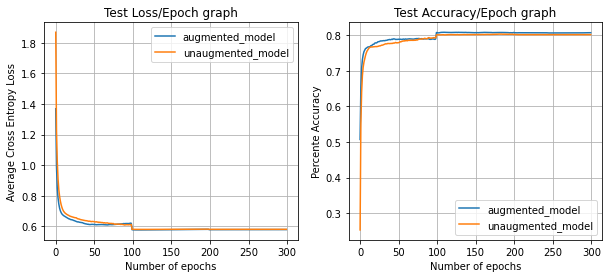

In [36]:
fig = plt.figure(figsize=(10, 4))
fig.add_subplot(1, 2, 1)
plt.plot(augmented_model.test_loss, label = 'augmented_model')
plt.plot(unaugmented_model.test_loss, label = 'unaugmented_model')
plt.grid()
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Average Cross Entropy Loss")
plt.title("Test Loss/Epoch graph")

#Ploting Accuracy per epoch graph.
fig.add_subplot(1, 2, 2)
plt.plot(augmented_model.test_acc, label = 'augmented_model')
plt.plot(unaugmented_model.test_acc, label = 'unaugmented_model')
plt.grid()
plt.legend()
plt.xlabel("Number of epochs")
plt.ylabel("Percente Accuracy")
plt.title("Test Accuracy/Epoch graph")
plt.show()

# -----------------------------------------------------------------------------------------------------------------

# Loading trained model

# -----------------------------------------------------------------------------------------------------------------

### Loading Unaugmented model

In [37]:
jkl = MLP(train_data_feature, one_hot_train_label, 
                        test_data_feature, one_hot_test_label, 
                        lr_rate = 0.01, batch_size = 64, epochs = 5)
print("Model accuracy without any training")
jkl.evaluate(Print = True)
jkl.load("unaugmented_model.pkl")
print("Model accuracy after loading pretrained unaugmented model weights")
jkl.evaluate(Print = True)

Model accuracy without any training
Loss : 2.303, Accuracy : 10.010
Model is loaded succesfully.
Model accuracy after loading pretrained unaugmented model weights
Loss : 0.580, Accuracy : 80.140


### Loading Augmented Model

In [38]:
mno = MLP(augmented_data_feature, augmented_label, 
                      test_data_feature, one_hot_test_label,
                      lr_rate = 0.01, batch_size = 64, epochs = 5)
print("Model accuracy without any training")
mno.evaluate(Print = True)
mno.load("augmented_model.pkl")
print("Model accuracy after loading pretrained augmented model weights")
mno.evaluate(Print = True)

Model accuracy without any training
Loss : 2.303, Accuracy : 10.010
Model is loaded succesfully.
Model accuracy after loading pretrained augmented model weights
Loss : 0.579, Accuracy : 80.680
